In [2]:
import numpy as np
import os
import glob
from DET import DET

scores_path = 'similarity_scores/'

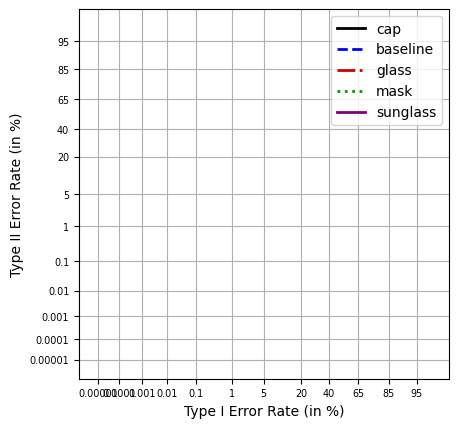

In [3]:
filtered_files = []
order = ['baseline','cap','glass','sunglass', 'mask']

for file in [os.path.basename(file) for file in glob.glob(scores_path + '*.npy')]:
    filename = os.path.splitext(file)[0]
    #print(filename)
    if 'real' and not 'synthetic' in filename:
        filtered_files.append('_'.join(filename.split('_')[:-1]))
    elif len(file.split('_')[3:-1]) == 1:
        filtered_files.append('_'.join(filename.split('_')[:-1]))
filtered_files = [*set(filtered_files)]
det = DET()
det.create_figure()
for file in filtered_files:
    non_mated = np.load(os.path.join(scores_path,file+'_non-mated.npy'))
    mated = np.load(os.path.join(scores_path,file+'_mated.npy'))
    if len(file.split('_')[3:]) == 1:
        system = file.split('_')[3:][0]
    else:
        system = 'baseline'
    det.plot(tar=mated, non=non_mated, label=system)
det.legend_on()
det.save('baseline_single_occ', 'pdf')

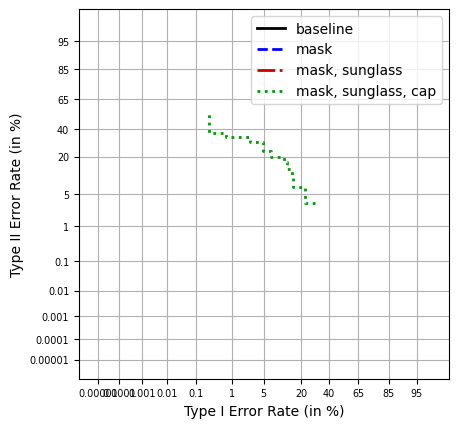

In [18]:
filters = ['_mask_m','_mask_sunglass_m','_mask_sunglass_cap_m']
order = ['baseline','mask','mask_sunglass','mask_sunglass_cap']
filtered_files = []

for file in [os.path.basename(file) for file in glob.glob(scores_path + '*_mated.npy')]:
    filename = os.path.splitext(file)[0]
    if 'real' and not 'synthetic' in filename:
        filtered_files.append(['baseline','_'.join(filename.split('_')[:-1])])
    elif any(substring in filename for substring in filters):
        filtered_files.append(['_'.join(filename.split('_')[3:-1]), '_'.join(filename.split('_')[:-1])])
filtered_files = sorted(filtered_files, key=lambda x: x[1])
det = DET()
det.create_figure()
for legend, file in filtered_files:
    non_mated = np.load(os.path.join(scores_path,file+'_non-mated.npy'))
    mated = np.load(os.path.join(scores_path,file+'_mated.npy'))
    legend = ', '.join(legend.split('_'))
    det.plot(tar=mated, non=non_mated, label=legend)
det.legend_on()
det.save('baseline_selected_occ', 'pdf')

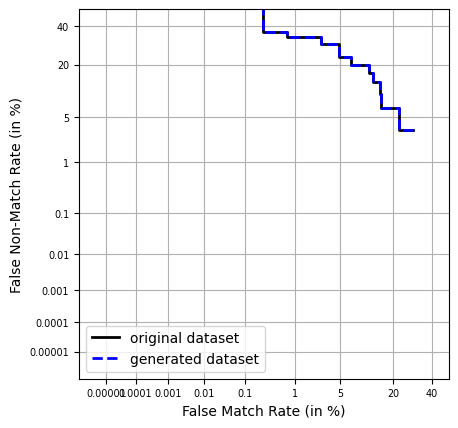

In [19]:
occlusion_list = []
for file in [os.path.basename(file) for file in glob.glob(scores_path + '*.npy')]:
    filename = os.path.splitext(file)[0]
    if 'real' and not 'synthetic' in filename:
        occlusion_list.append('original dataset')
    elif not any([x in filename for x in ['cap','mask','glass','sunglass']]):
        occlusion_list.append('generated dataset')
    else:
        continue
        occlusion_list.append(
            ('_'.join(os.path.splitext(file)[0].split('_')[3:-1])))
occlusion_list = [*set(list(filter(None, occlusion_list)))]
occlusion_list.sort(reverse=True)

det = DET(biometric_evaluation_type='algorithm')
det.create_figure()
for occlusion in occlusion_list:
    if occlusion == 'real':
        system = 'baseline'
        for file in [os.path.basename(file) for file in glob.glob(scores_path + 'real' + '*mated.npy')]:
            if 'non-mated' in os.path.basename(file):
                non_mated = np.load(os.path.join(scores_path,file))
            else:
                mated = np.load(os.path.join(scores_path,file))
    else:
        system = occlusion
        for file in [os.path.basename(file) for file in glob.glob(scores_path + '*mated_' + occlusion + '.npy')]:
            if 'non-mated' in os.path.basename(file):
                non_mated = np.load(os.path.join(scores_path,file))
            else:
                mated = np.load(os.path.join(scores_path,file))
    det.plot(tar=mated, non=non_mated, label=system)
det.legend_on()
det.save('dataset-occluded_dataset', 'pdf')